# Homework 6: Solutions


<br>

**Conceptual: ** Short answer questions. Be concise.

---
(1) What is the “curse of dimensionality” in a regression context? How does it impact your model fit, and how does it affect the interpretability of your results? Be specific and define what a “high dimensional” statistical problem is.

**Answer:** 
In the regression context, the curse of dimensionality is the case where n (sample size) approaches p (model complexity). This runs the risk of overfitting your data, leading to the detection of spurious relationships in the model. 



---

(2) Describe conceptually how subset selection, shrinkage models (e.g., ridge regression, lasso), and dimensionality reduction approaches (e.g, principal component regression) approaches deal with the curse of dimensionality. Contrast how each approach differs from the others. 

**Answer:** Subset selection approaches, as well as forward and backward stepwise selection, deals with high dimensionality by trying to reduce model complexity (i.e., p). Unlike shrinkage models and dimensionality reduction approaches, subset selection approaches use goodness of fit measures to compare how well different permutations of the model explain the response variable (y) after accounting for differences in model complexity. These approaches penalize more complex models, thus trying to find the simplest model with the most explanatory power.

Shrinkage models, like ridge regression and LASSO, use a penalization term in the model fitting process to shrink or reduce the effect size of predictor variables that have little influence on the response variable. Ridge regression uses an L2 norm to shrink non-informative parameters to close to zero. LASSO uses an L1 norm to force non-informative parameters to be zero, thus doing model selection like subset selection approaches. Unlike subset selection methods, shrinkage models do not compare different model per se, but simply try to find the optimal penalty term to shrink uninformative parameters.

Dimensionality reduction techniques, like principal components regression (PCR) and partial least squares (PLS) regression, try to reduce the dimensionality of the model fit by finding a lower dimensional reflection of the p predictor variables. Using principal components analysis or similar routines, these approaches make a new set of m predictor variables, where m<p, that are then fit to a linear regression model. Unlike subset selection, separate models are not compared once the new low dimensional components are identified. Unlike shrinkage models, there is no penalty applied to the fitting routine used to find the relationships between the m components and the response variable y.


---

(3) For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.

(a) The lasso, relative to least squares, is:

    i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

    ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

    iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

    iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

**Answer:** 
iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

<br>
(b) Repeat (a) for ridge regression relative to least squares.

**Answer:** iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

<br>
(c) Repeat (a) for principal component regression relative to least squares.

**Answer:** ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

---
**Applied:** Show your code & plots

Do applied exercises 6.8 & 6.9.

In [2]:
# --------------------
# 6.8
# --------------------
library(ISLR)

# 6.8a
set.seed(1)
X = rnorm(100)
eps = rnorm(100)


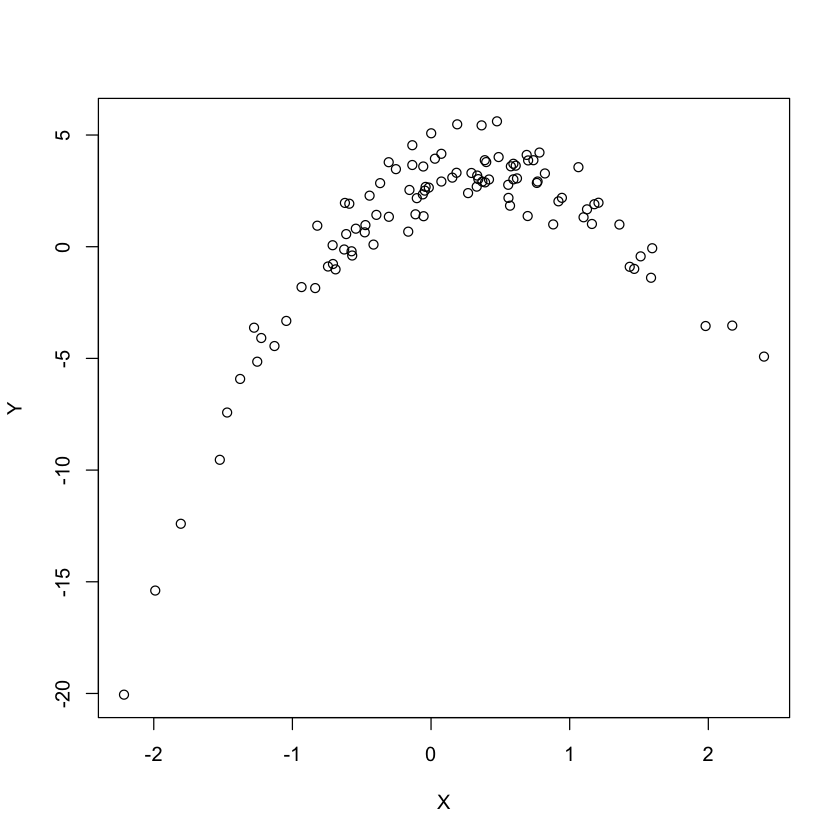

In [6]:

# 6.8b
beta0 = 3
beta1 = 2
beta2 = -3
beta3 = 0.3
Y = beta0 + beta1 * X + beta2 * X^2 + beta3 * X^3 + eps

plot(X,Y)

[1] 3

[1] 3

[1] 3

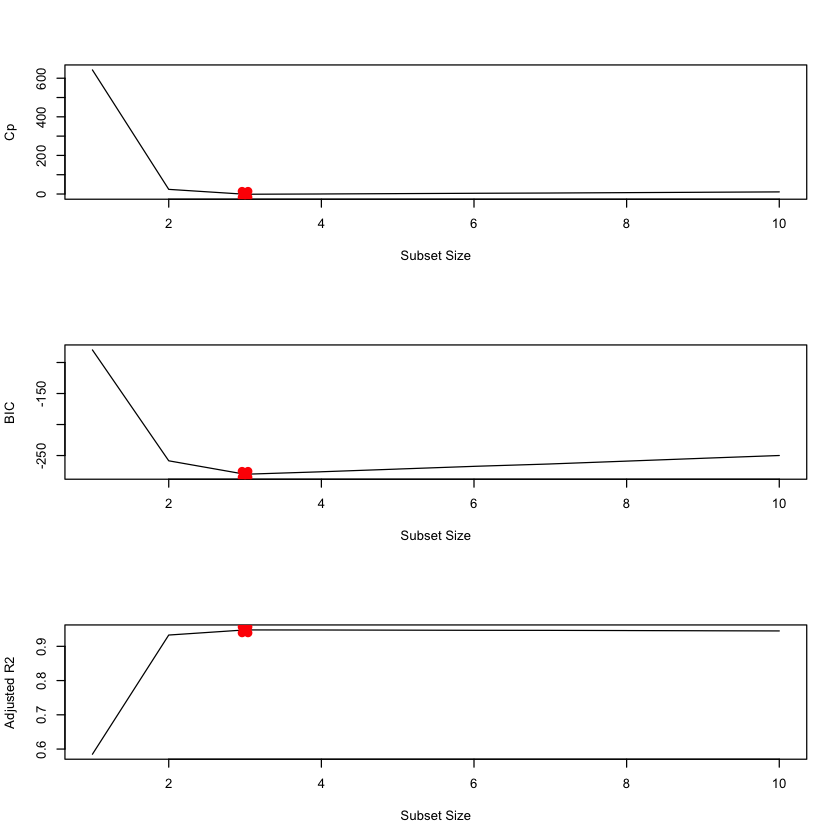

In [12]:
# 6.8c
library(leaps)
data.full = data.frame(y = Y, x = X)
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10)
mod.summary = summary(mod.full)

which.min(mod.summary$cp)
which.min(mod.summary$bic)
which.max(mod.summary$adjr2)

# Plot cp
op<-par(mfrow=c(3,1))
plot(mod.summary$cp, xlab = "Subset Size", ylab = "Cp", pch = 20, type = "l")
points(3, mod.summary$cp[3], pch = 4, col = "red", lwd = 7)

plot(mod.summary$bic, xlab = "Subset Size", ylab = "BIC", pch = 20, type = "l")
points(3, mod.summary$bic[3], pch = 4, col = "red", lwd = 7)

plot(mod.summary$adjr2, xlab = "Subset Size", ylab = "Adjusted R2", pch = 20, 
     type = "l")
points(3, mod.summary$adjr2[3], pch = 4, col = "red", lwd = 7)


All three bias-adjusted measures are pointing to the third model (i.e., cubic polynomial).

In [9]:
coefficients(mod.full, id = 3)


(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           3.07627412            2.35623596           -3.16514887 
poly(x, 10, raw = T)7 
           0.01046843

In [13]:
# 6.8d
mod.fwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
                     method = "forward")
mod.bwd = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10, 
                     method = "backward")
fwd.summary = summary(mod.fwd)
bwd.summary = summary(mod.bwd)

which.min(fwd.summary$cp)
which.min(bwd.summary$cp)
which.min(fwd.summary$bic)
which.min(bwd.summary$bic)
which.max(fwd.summary$adjr2)
which.max(bwd.summary$adjr2)

[1] 3

[1] 3

[1] 3

[1] 3

[1] 3

[1] 3

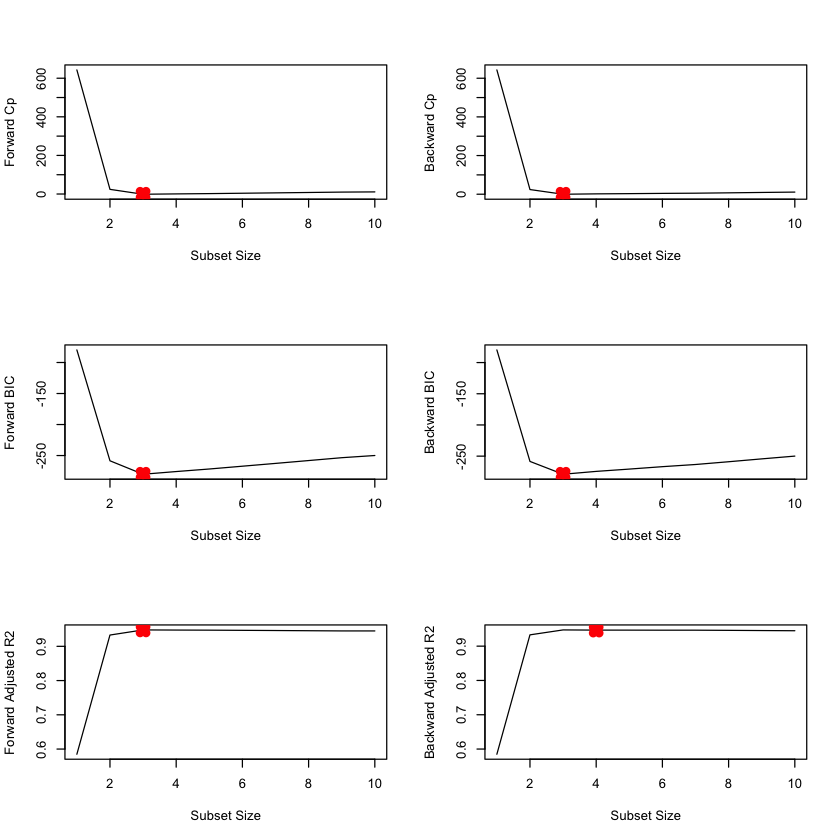

In [14]:
# Now plot
par(mfrow = c(3, 2))
plot(fwd.summary$cp, xlab = "Subset Size", ylab = "Forward Cp", pch = 20, type = "l")
points(3, fwd.summary$cp[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$cp, xlab = "Subset Size", ylab = "Backward Cp", pch = 20, type = "l")
points(3, bwd.summary$cp[3], pch = 4, col = "red", lwd = 7)
plot(fwd.summary$bic, xlab = "Subset Size", ylab = "Forward BIC", pch = 20, 
     type = "l")
points(3, fwd.summary$bic[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$bic, xlab = "Subset Size", ylab = "Backward BIC", pch = 20, 
     type = "l")
points(3, bwd.summary$bic[3], pch = 4, col = "red", lwd = 7)
plot(fwd.summary$adjr2, xlab = "Subset Size", ylab = "Forward Adjusted R2", 
     pch = 20, type = "l")
points(3, fwd.summary$adjr2[3], pch = 4, col = "red", lwd = 7)
plot(bwd.summary$adjr2, xlab = "Subset Size", ylab = "Backward Adjusted R2", 
     pch = 20, type = "l")
points(4, bwd.summary$adjr2[4], pch = 4, col = "red", lwd = 7)

Most of the procedures picked p=3, except for the backwards adjusted r-square, which chose p=4. This is close enough


In [15]:
coefficients(mod.fwd, id = 3)
coefficients(mod.bwd, id = 3)
coefficients(mod.bwd, id = 4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           3.07627412            2.35623596           -3.16514887 
poly(x, 10, raw = T)7 
           0.01046843

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
          3.078881355           2.419817953          -3.177235617 
poly(x, 10, raw = T)9 
          0.001870457

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
         3.0854225293          2.4238853837         -3.1920278379 
poly(x, 10, raw = T)8 poly(x, 10, raw = T)9 
         0.0001942784          0.0018322061

With the exception of the backwards stepwise search, these results largely match the subset selection step. 


[1] 0.0301936

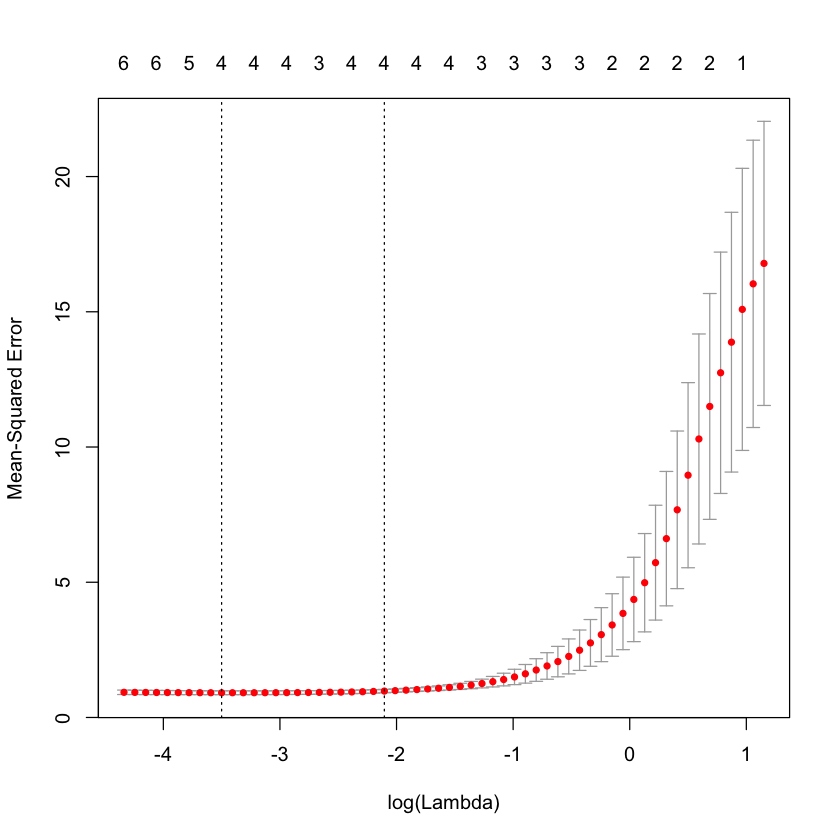

In [17]:
# 6.8e
library(glmnet)
xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]
mod.lasso = cv.glmnet(xmat, Y, alpha = 1)
best.lambda = mod.lasso$lambda.min
best.lambda
# 0.03991416

plot(mod.lasso)

In [18]:
# Now take your best lambda and report the coefficients
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                                  1
(Intercept)             3.048282677
poly(x, 10, raw = T)1   2.245383651
poly(x, 10, raw = T)2  -3.116365726
poly(x, 10, raw = T)3   .          
poly(x, 10, raw = T)4   .          
poly(x, 10, raw = T)5   0.045395157
poly(x, 10, raw = T)6   .          
poly(x, 10, raw = T)7   0.001780867
poly(x, 10, raw = T)8   .          
poly(x, 10, raw = T)9   .          
poly(x, 10, raw = T)10  .          

Lasso also includes a 4 term model, with the 3rd and 5th parameters. It also picks the 7th parameter  to keep in the model.


In [19]:
# 6.8f
beta7 = 7
Y = beta0 + beta7 * X^7 + eps
data.full = data.frame(y = Y, x = X)
mod.full = regsubsets(y ~ poly(x, 10, raw = T), data = data.full, nvmax = 10)
mod.summary = summary(mod.full)

which.min(mod.summary$cp)
which.min(mod.summa`bry$bic)
which.max(mod.summary$adjr2)

[1] 2

[1] 1

[1] 4

In [20]:
coefficients(mod.full, id = 1)
coefficients(mod.full, id = 2)
coefficients(mod.full, id = 4)

(Intercept) poly(x, 10, raw = T)7 
              2.95894               7.00077

(Intercept) poly(x, 10, raw = T)2 poly(x, 10, raw = T)7 
            3.0704904            -0.1417084             7.0015552

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
            3.0762524             0.2914016            -0.1617671 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)7 
           -0.2526527             7.0091338


The model using the BIC selection (id=1) recovers only the real coefficient beta=7. The other evaluations recover the true effect but also misc. other variables we know  not to be true.


In [21]:
# Next let's do the LASSO
xmat = model.matrix(y ~ poly(x, 10, raw = T), data = data.full)[, -1]
mod.lasso = cv.glmnet(xmat, Y, alpha = 1)
best.lambda = mod.lasso$lambda.min
best.lambda

[1] 13.57478

In [22]:
best.model = glmnet(xmat, Y, alpha = 1)
predict(best.model, s = best.lambda, type = "coefficients")

11 x 1 sparse Matrix of class "dgCMatrix"
                              1
(Intercept)            3.904188
poly(x, 10, raw = T)1  .       
poly(x, 10, raw = T)2  .       
poly(x, 10, raw = T)3  .       
poly(x, 10, raw = T)4  .       
poly(x, 10, raw = T)5  .       
poly(x, 10, raw = T)6  .       
poly(x, 10, raw = T)7  6.776797
poly(x, 10, raw = T)8  .       
poly(x, 10, raw = T)9  .       
poly(x, 10, raw = T)10 .       

LASSO also picks up the single variable solution. 

---

In [23]:
# --------------------
# 6.9
# --------------------

# 6.9a
set.seed(11)
sum(is.na(College))
# 0

train.size = dim(College)[1] / 2
train = sample(1:dim(College)[1], train.size)
test = -train
College.train = College[train, ]
College.test = College[test, ]

[1] 0

In [25]:
# 6.9b
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

[1] 1538442

In [26]:
# 6.9c
library(glmnet)
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

[1] 18.73817

In [27]:
ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)

[1] 1608859

In [28]:
# 6.9d
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

[1] 21.54435

In [29]:
lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)

[1] 1635280

In [30]:
mod.lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(mod.lasso, s=lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -6.038452e+02
(Intercept)  .           
PrivateYes  -4.235413e+02
Accept       1.455236e+00
Enroll      -2.003696e-01
Top10perc    3.367640e+01
Top25perc   -2.403036e+00
F.Undergrad  .           
P.Undergrad  2.086035e-02
Outstate    -5.781855e-02
Room.Board   1.246462e-01
Books        .           
Personal     1.832910e-05
PhD         -5.601313e+00
Terminal    -3.313824e+00
S.F.Ratio    4.478684e+00
perc.alumni -9.796600e-01
Expend       6.967693e-02
Grad.Rate    5.159652e+00


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



[1] 3014496

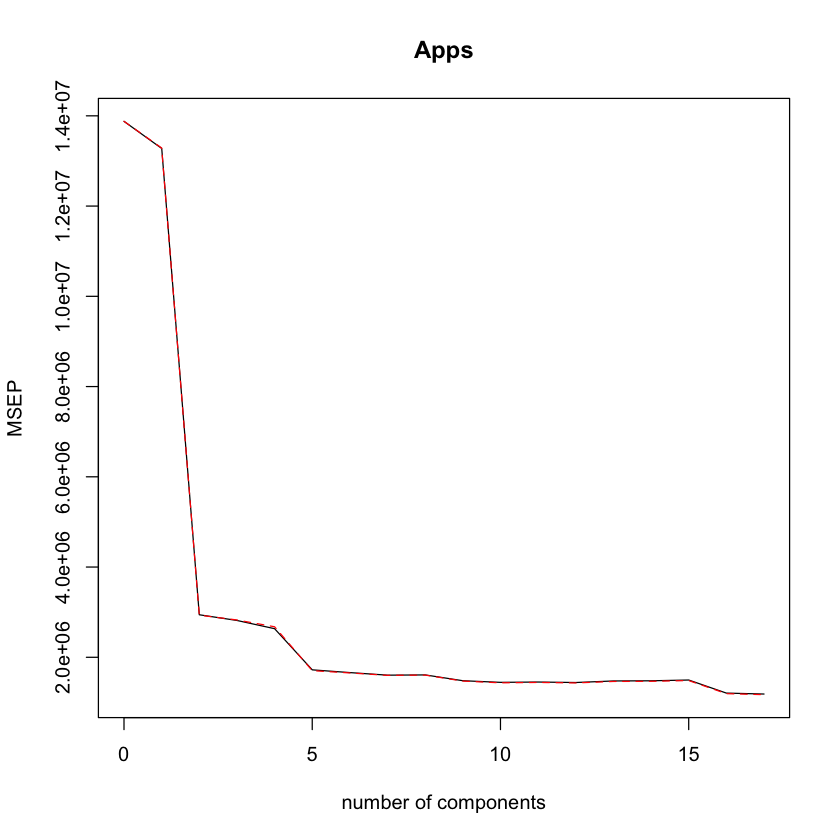

In [31]:
# 6.9e
library(pls)
pcr.fit = pcr(Apps~., data=College.train, scale=T, validation="CV")

validationplot(pcr.fit, val.type="MSEP")

pcr.pred = predict(pcr.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pcr.pred))^2)


[1] 1508987

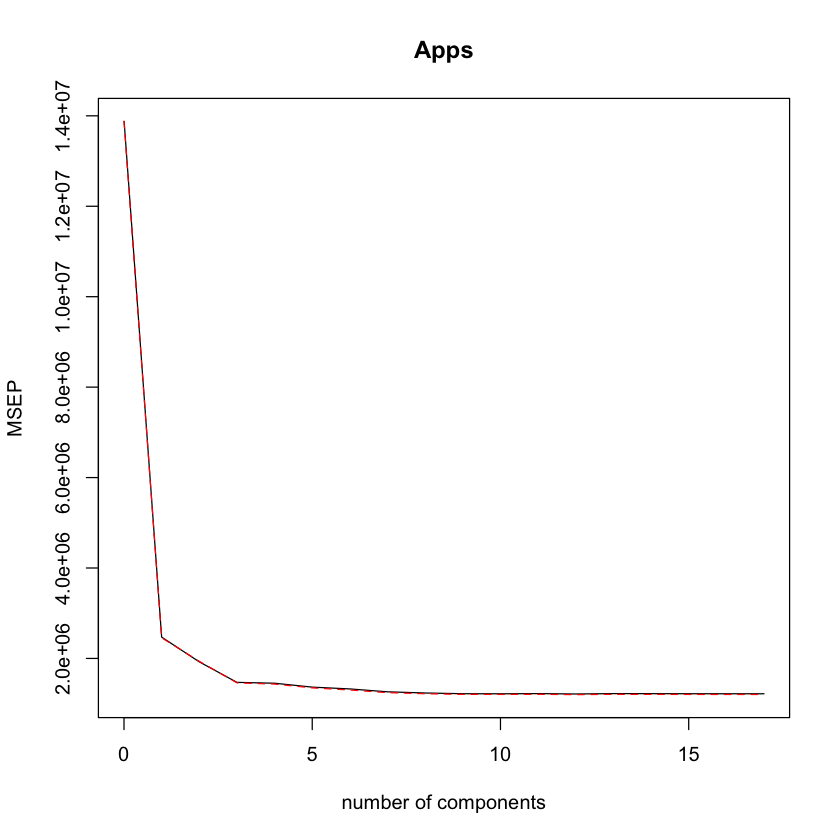

In [32]:
# 6.9f
pls.fit = plsr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pls.fit, val.type="MSEP")

pls.pred = predict(pls.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pls.pred))^2)


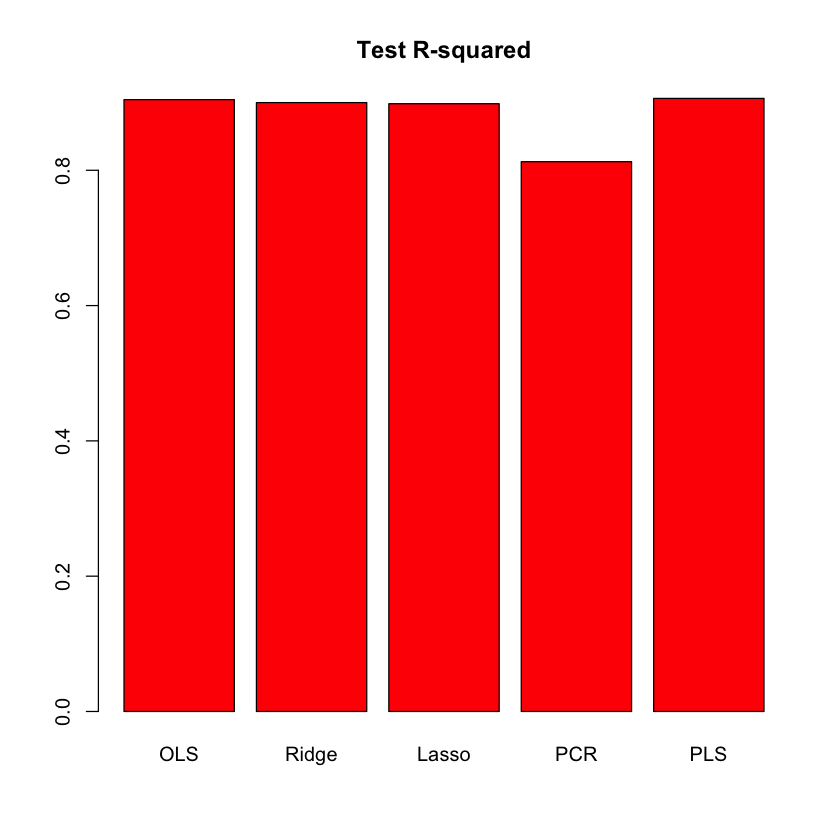

In [34]:
# 6.9g
test.avg = mean(College.test[, "Apps"])
lm.test.r2 = 1 - mean((College.test[, "Apps"] - lm.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
ridge.test.r2 = 1 - mean((College.test[, "Apps"] - ridge.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
lasso.test.r2 = 1 - mean((College.test[, "Apps"] - lasso.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
pcr.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pcr.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
pls.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pls.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)

barplot(c(lm.test.r2, ridge.test.r2, lasso.test.r2, pcr.test.r2, pls.test.r2), col="red", names.arg=c("OLS", "Ridge", "Lasso", "PCR", "PLS"), main="Test R-squared")


Most of the test errors are about the same (i.e., R-squares 0.9) except for PCR, which has a lower R-square. So all models except for PCR predict college applications with high accuracy (i.e., ~90% of the variance)
